## SFR with Mass Ratio
Here, we are looking for any relation with mass ratio to star fomration rate. Found from my subsample of galaxy pairs.

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import sys
import cv2 as cv
from tqdm import tqdm
tqdm.pandas()

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
cos_dat_fold = 'E:/cosmos-data'

### Importing My Data

In [3]:
df_cat = pd.read_csv(f'{combine_fold}/cosmos2020-categorised-interactions.csv', index_col = 0)

In [4]:
df_cat.head()

,ORyan23_ID,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage3,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-0.000010,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,861738,stage1,150.645118,2.237538,10033.689453,22720.843750,0.000039,0.000078,0.000013,...,-9.574272,-9.548649,-9.503962,-9.439343,-9.384205,0.240042,0.281559,0.330791,0.384371,0.436491
2,4000705539529,1284864,stage1,149.686223,2.637412,33027.406250,32317.517578,0.000031,0.000030,0.000001,...,-9.669377,-9.614943,-9.570104,-9.533121,-9.476167,0.094187,0.114436,0.140990,0.159430,0.183608
3,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-0.000003,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
4,4000705540034,1304538,stage1,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-0.000006,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727


In [5]:
df_red_tmp = df_cat.query('ez_sfr < 10')
df_red = df_red_tmp.query('lp_mass_best > 6.5')

### Reducing DataFrame

In [6]:
df_ra_dec = (
    df_red
    [['ORyan23_ID', 'ID', 'category', 'ALPHA_J2000', 'DELTA_J2000', 'ez_z_phot', 'lp_zBEST', 'lp_mass_best', 'ez_sfr']]
)

In [7]:
def getting_duplicates(id_str, df):
    check = len(df.query('ORyan23_ID == @id_str'))
    if check > 1.5:
        return 'y'
    else:
        return 'n'

In [8]:
def picking_z(ez_z, lp_z):
    if np.isnan(ez_z):
        if not np.isnan(lp_z):
            return lp_z
        else:
            return np.nan
    
    if np.isnan(lp_z):
        if not np.isnan(ez_z):
            return ez_z
        else:
            return np.nan
    
    if lp_z < ez_z:
        return lp_z
    elif ez_z <= lp_z:
        return ez_z
    else:
        return 'what'

### Finding Duplicates

In [9]:
df_checked = (
    df_ra_dec
    .assign(coords = df_ra_dec.apply(lambda row: SkyCoord(ra = row.ALPHA_J2000 * u.deg, dec = row.DELTA_J2000 * u.deg, frame = 'fk5'), axis = 1))
    .assign(filt = df_ra_dec.ORyan23_ID.apply(lambda x: getting_duplicates(x, df_ra_dec)))
    .assign(z = df_ra_dec.apply(lambda row: picking_z(row.ez_z_phot, row.lp_zBEST), axis = 1))
)

In [10]:
df_filt = df_checked.query('filt == "y"').drop(columns = ['ez_z_phot', 'lp_zBEST'])
df_filt

,ORyan23_ID,ID,category,ALPHA_J2000,DELTA_J2000,lp_mass_best,ez_sfr,coords,filt,z
2237,4000705540005,1307416,stage3,149.723145,2.658653,10.35057,0.647159,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.442084
2238,4000708110752,958323,stage1,150.119051,2.324495,11.17791,1.026781,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.602500
2239,4000749509721,977735,stage2,149.881193,2.341328,9.62591,0.661792,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.792800
2240,4000767041112,792252,stage1,149.785875,2.172956,9.94800,0.649523,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.346103
2241,4000812790810,510098,stage4,149.493213,1.905151,9.56777,0.365039,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.299200
...,...,...,...,...,...,...,...,...,...,...
3791,6000535066150,1157587,stage4,150.422510,2.514655,10.56569,0.131293,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.671415
3792,6000535121452,1035987,stage1,149.694761,2.397231,9.83575,-0.122069,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.331183
3793,6000535865556,1138628,stage1,150.490889,2.496660,9.47153,0.220862,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.879100
3794,6000536013605,1203157,stage1,150.202813,2.558504,10.25633,0.975221,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",y,0.774100


In [11]:
bool_ser = df_filt.duplicated(subset='ORyan23_ID', keep='first')

In [12]:
df_prim = (
    df_filt[bool_ser]
    .drop(columns = 'filt')
    .rename(columns = {'ORyan23_ID': 'ORyan23_ID_1','ID': 'ID_Prim', 'category' : 'prim_cat', 'ALPHA_J2000': 'Prim_RA','DELTA_J2000' : 'Prim_Dec', 'coords' : 'prim_coords', 'z' : 'z_prim', 'ez_sfr':'ez_sfr_prim','lp_mass_best':'lp_mass_best_prim'})
)
df_sec = (
    df_filt[~bool_ser]
    .drop(columns = 'filt')
    .rename(columns = {'ORyan23_ID': 'ORyan23_ID_2', 'ID': 'ID_Sec', 'category' : 'sec_cat', 'ALPHA_J2000': 'Sec_RA','DELTA_J2000' : 'Sec_Dec', 'coords' : 'sec_coords', 'z' : 'z_sec', 'ez_sfr':'ez_sfr_sec','lp_mass_best':'lp_mass_best_sec'})
)

In [13]:
df_prim_sec = (
    df_prim.merge(df_sec, left_on = 'ORyan23_ID_1', right_on = 'ORyan23_ID_2', how = 'left')
)
df_prim_sec

,ORyan23_ID_1,ID_Prim,prim_cat,Prim_RA,Prim_Dec,lp_mass_best_prim,ez_sfr_prim,prim_coords,z_prim,ORyan23_ID_2,ID_Sec,sec_cat,Sec_RA,Sec_Dec,lp_mass_best_sec,ez_sfr_sec,sec_coords,z_sec
0,4175032695,352511,stage1,150.178767,1.750506,10.44980,0.221418,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.271055,4175032695,351054,stage1,150.180276,1.753549,9.73456,0.516089,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.284623
1,4575953945,1124323,stage4,149.687520,2.480424,9.76997,-0.232994,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.313699,4575953945,1118857,stage4,149.687643,2.477427,9.46014,-0.202330,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.305336
2,4651333659,718770,stage1,149.818503,2.102772,10.74354,0.730193,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.632000,4651333659,714303,stage1,149.817268,2.103133,9.82053,0.769956,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.658200
3,4000705540005,1305894,stage3,149.722207,2.660240,10.85063,0.638292,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",1.445788,4000705540005,1307416,stage3,149.723145,2.658653,10.35057,0.647159,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.442084
4,4000708110752,959618,stage1,150.119472,2.322125,10.97378,-1.020907,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.600800,4000708110752,958323,stage1,150.119051,2.324495,11.17791,1.026781,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.602500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,6000535066150,1157587,stage4,150.422510,2.514655,10.56569,0.131293,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.671415,6000535066150,1157455,stage4,150.422657,2.512777,10.37112,1.029161,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.670400
743,6000535121452,1035987,stage1,149.694761,2.397231,9.83575,-0.122069,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.331183,6000535121452,1042177,stage1,149.693918,2.396792,10.22087,0.512719,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.374718
744,6000535865556,1138628,stage1,150.490889,2.496660,9.47153,0.220862,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.879100,6000535865556,1144648,stage1,150.492010,2.497863,11.11127,0.343823,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.883193
745,6000536013605,1203157,stage1,150.202813,2.558504,10.25633,0.975221,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.774100,6000536013605,1203158,stage1,150.202121,2.559187,9.39806,0.615512,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.755400


In [14]:
df_check = (
    df_prim_sec
    .assign(check = df_prim_sec.apply(lambda row: 'n' if row.ORyan23_ID_1 != row.ORyan23_ID_2 else 'y', axis = 1))
)

In [15]:
df_check.check.value_counts()

y    747
Name: check, dtype: int64

### Checking Z-Differences

In [16]:
df_z_check = (
    df_prim_sec
    .assign(z_diff = df_prim_sec.apply(lambda row: row.z_prim - row.z_sec, axis = 1))
)

In [17]:
len(df_z_check)

747

In [18]:
df_z_checked = df_z_check.query('z_diff >= -0.1 and z_diff <= 0.1')

In [19]:
df_z_checked

,ORyan23_ID_1,ID_Prim,prim_cat,Prim_RA,Prim_Dec,lp_mass_best_prim,ez_sfr_prim,prim_coords,z_prim,ORyan23_ID_2,ID_Sec,sec_cat,Sec_RA,Sec_Dec,lp_mass_best_sec,ez_sfr_sec,sec_coords,z_sec,z_diff
0,4175032695,352511,stage1,150.178767,1.750506,10.44980,0.221418,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.271055,4175032695,351054,stage1,150.180276,1.753549,9.73456,0.516089,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.284623,-0.013568
1,4575953945,1124323,stage4,149.687520,2.480424,9.76997,-0.232994,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.313699,4575953945,1118857,stage4,149.687643,2.477427,9.46014,-0.202330,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.305336,0.008364
2,4651333659,718770,stage1,149.818503,2.102772,10.74354,0.730193,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.632000,4651333659,714303,stage1,149.817268,2.103133,9.82053,0.769956,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.658200,-0.026200
4,4000708110752,959618,stage1,150.119472,2.322125,10.97378,-1.020907,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.600800,4000708110752,958323,stage1,150.119051,2.324495,11.17791,1.026781,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.602500,-0.001700
5,4000749509721,971994,stage2,149.881535,2.340141,9.41265,0.694530,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.751300,4000749509721,977735,stage2,149.881193,2.341328,9.62591,0.661792,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.792800,-0.041500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,6000535008523,1016112,stage1,150.027738,2.373879,11.30303,-2.347923,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.226895,6000535008523,1018703,stage1,150.028460,2.375080,10.52583,0.590401,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.225256,0.001639
742,6000535066150,1157587,stage4,150.422510,2.514655,10.56569,0.131293,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.671415,6000535066150,1157455,stage4,150.422657,2.512777,10.37112,1.029161,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.670400,0.001015
743,6000535121452,1035987,stage1,149.694761,2.397231,9.83575,-0.122069,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.331183,6000535121452,1042177,stage1,149.693918,2.396792,10.22087,0.512719,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.374718,-0.043535
744,6000535865556,1138628,stage1,150.490889,2.496660,9.47153,0.220862,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.879100,6000535865556,1144648,stage1,150.492010,2.497863,11.11127,0.343823,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.883193,-0.004093


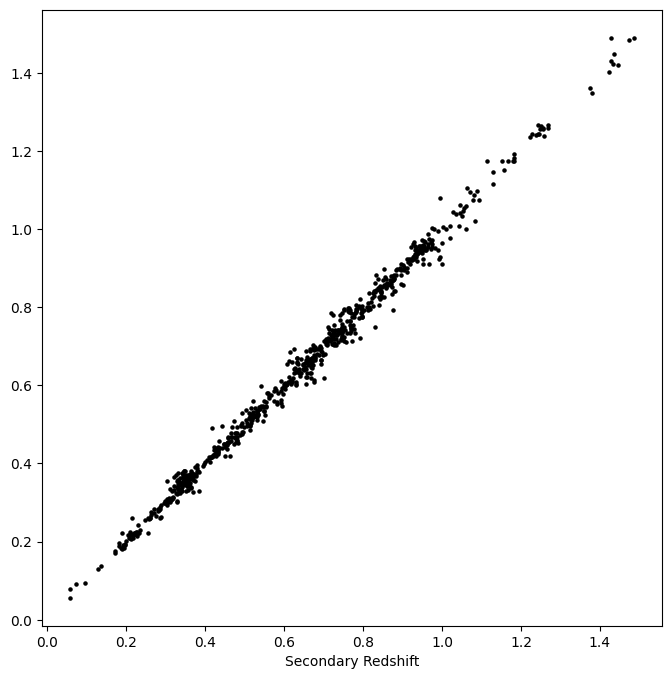

In [20]:
plt.figure(figsize = (8,8))
plt.scatter(df_z_checked.z_prim, df_z_checked.z_sec, s = 5, color = 'black')
plt.xlabel('Primary Redshift')
plt.xlabel('Secondary Redshift')

plt.show()

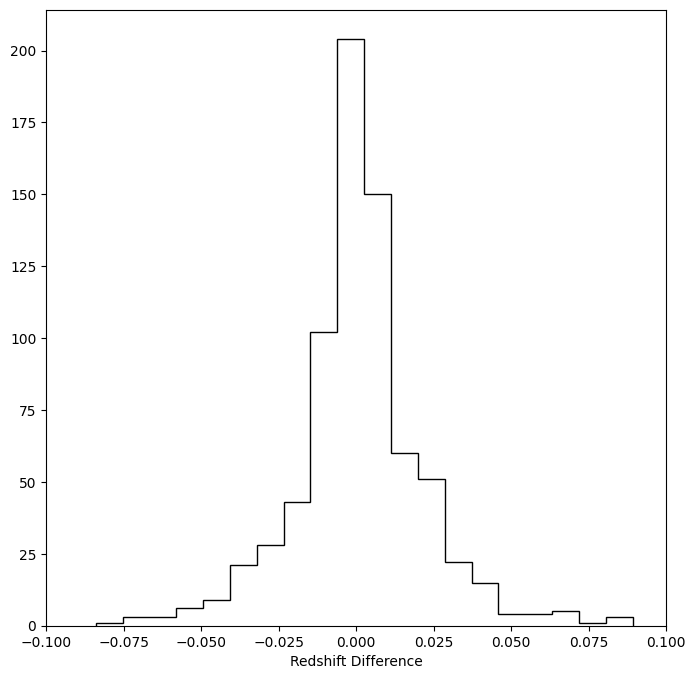

In [21]:
plt.figure(figsize = (8,8))
plt.hist(df_z_checked.z_diff, bins = 20, color = 'black', histtype='step')
plt.xlabel('Redshift Difference')
plt.xlim([-0.1,0.1])
plt.show()

### Calculating Mass Ratios

In [24]:
print(len(df_z_checked))
df_z_checked.head()

735


,ORyan23_ID_1,ID_Prim,prim_cat,Prim_RA,Prim_Dec,lp_mass_best_prim,ez_sfr_prim,prim_coords,z_prim,ORyan23_ID_2,ID_Sec,sec_cat,Sec_RA,Sec_Dec,lp_mass_best_sec,ez_sfr_sec,sec_coords,z_sec,z_diff
0,4175032695,352511,stage1,150.178767,1.750506,10.44980,0.221418,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.271055,4175032695,351054,stage1,150.180276,1.753549,9.73456,0.516089,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.284623,-0.013568
1,4575953945,1124323,stage4,149.687520,2.480424,9.76997,-0.232994,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.313699,4575953945,1118857,stage4,149.687643,2.477427,9.46014,-0.202330,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.305336,0.008364
2,4651333659,718770,stage1,149.818503,2.102772,10.74354,0.730193,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.632000,4651333659,714303,stage1,149.817268,2.103133,9.82053,0.769956,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.658200,-0.026200
4,4000708110752,959618,stage1,150.119472,2.322125,10.97378,-1.020907,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.600800,4000708110752,958323,stage1,150.119051,2.324495,11.17791,1.026781,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.602500,-0.001700
5,4000749509721,971994,stage2,149.881535,2.340141,9.41265,0.694530,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.751300,4000749509721,977735,stage2,149.881193,2.341328,9.62591,0.661792,"<SkyCoord (FK5: equinox=J2000.000): (ra, dec) ...",0.792800,-0.041500


In [26]:
df_z_red = (
    df_z_checked.drop(columns = ['Prim_RA', 'Prim_Dec', 'prim_coords', 'Sec_RA', 'Sec_Dec', 'sec_coords'])
)

In [34]:
def calc_mr(logm1, logm2):
    m1 = 10 ** logm1
    m2 = 10 ** logm2

    if m1 > m2:
        return m2 / m1
    elif m2 > m1:
        return m1 / m2
    else:
        return 'Failed.'

In [35]:
df_mr = (
    df_z_red
    .assign(mr = df_z_red.apply(lambda row: calc_mr(row.lp_mass_best_prim, row.lp_mass_best_sec), axis = 1))
)

In [37]:
df_mr.mr.min()

0.0034548563938405345

In [38]:
df_mr.mr.max()

0.9989873756095391

### Diagnostics of Mass Ratios

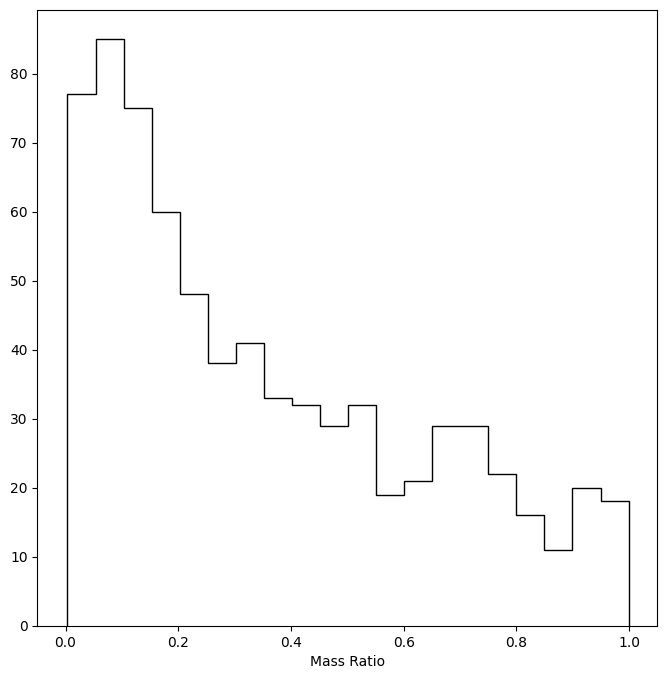

In [42]:
plt.figure(figsize = (8,8))
plt.hist(df_mr.mr , histtype='step', color='black', bins = 20)
plt.xlabel('Mass Ratio')
plt.xlim([-0.05,1.05])
plt.show()

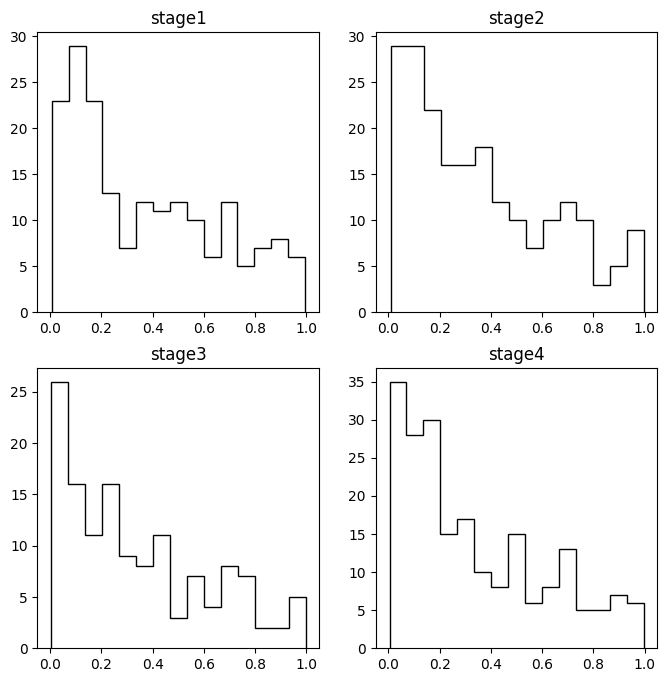

In [44]:
counter = 1
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        stage = f'stage{counter}'
        mrs = np.array(df_mr.query('prim_cat == @stage').mr)
        
        ax[i,j].hist(mrs, bins = 15, histtype='step', color='black')
        ax[i,j].set_title(stage)
        ax[i,j].set_xlim([-0.05, 1.05])
        
        counter += 1

In [85]:
def get_mr_clsf(mr):
    if mr < 0.125:
        return 'micro'
    elif mr >= 0.125 and mr < 0.85:
        return 'minor'
    elif mr >= 0.85:
        return 'major'

In [86]:
df_mr_cat = (
    df_mr
    .assign(mr_cat = df_mr.mr.apply(lambda x: get_mr_clsf(x)))
)

In [87]:
df_mr_cat.mr_cat.value_counts()

minor    486
micro    200
major     49
Name: mr_cat, dtype: int64

In [88]:
labels = ['micro', 'minor', 'major']
values = [df_mr_cat.mr_cat.value_counts().micro, df_mr_cat.mr_cat.value_counts().minor, df_mr_cat.mr_cat.value_counts().major]

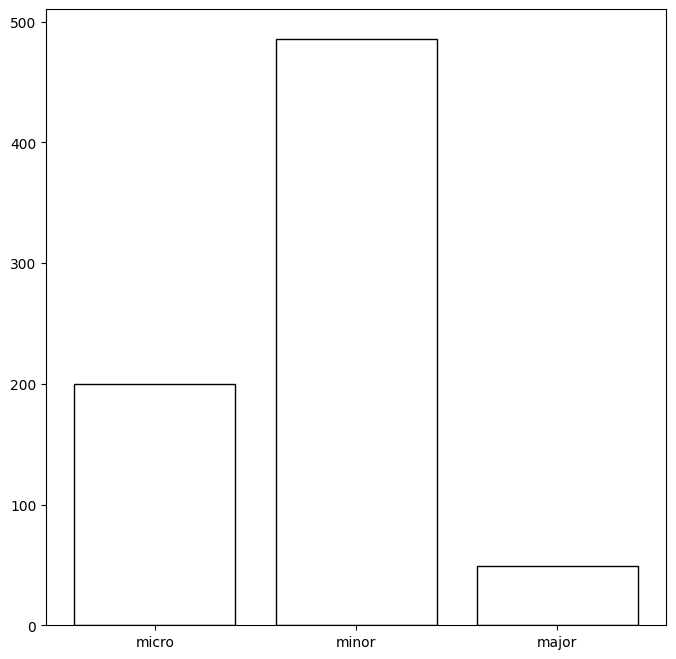

In [89]:
plt.figure(figsize = (8,8))
plt.bar(labels, values, fill=None)
plt.show()

In [90]:
def add_log(logx1, logx2):
    x1 = 10 ** logx1
    x2 = 10 ** logx2
    x = x1 + x2
    return np.log10(x)

In [91]:
df_mr_params = (
    df_mr_cat
    .assign(mass_tot = df_mr_cat.apply(lambda row: add_log(row.lp_mass_best_prim, row.lp_mass_best_sec), axis = 1))
    .assign(sfr_tot = df_mr_cat.apply(lambda row: add_log(row.ez_sfr_prim, row.ez_sfr_sec), axis = 1))
)

### Investigating Parameters with Type

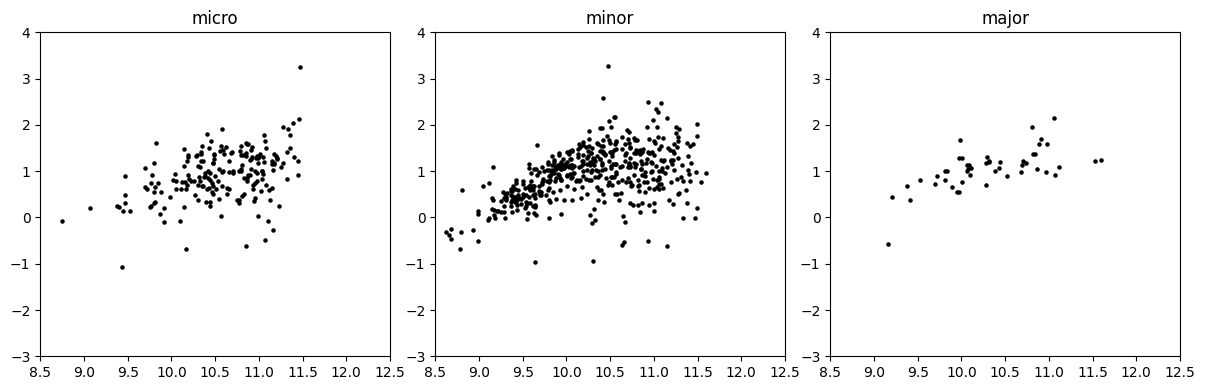

In [92]:
fig, ax = plt.subplots(ncols = 3, figsize = (12,4))
for i, int_type in enumerate(labels):
    df_type = df_mr_params.query('mr_cat == @int_type')
    ax[i].scatter(df_type.mass_tot, df_type.sfr_tot, color = 'black', s = 5)
    ax[i].set_title(int_type)
    ax[i].set_xlim([8.5, 12.5])
    ax[i].set_ylim([-3,4])
fig.tight_layout()
plt.show()

In [134]:
def scatter_contours(x, y, ax, colour):
    # the scatter plot:
    ax.scatter(x, y, s = 5, color=colour, alpha = 0.5)
    #threshold = 0.065
    sns.kdeplot(x=x,y=y, ax=ax, thresh = 0.0875, levels=5, color='red')
    ax.set_xlim([8,12.5])
    ax.set_ylim([-3, 3.5])
    ax.set_xlabel('')
    ax.set_ylabel('')

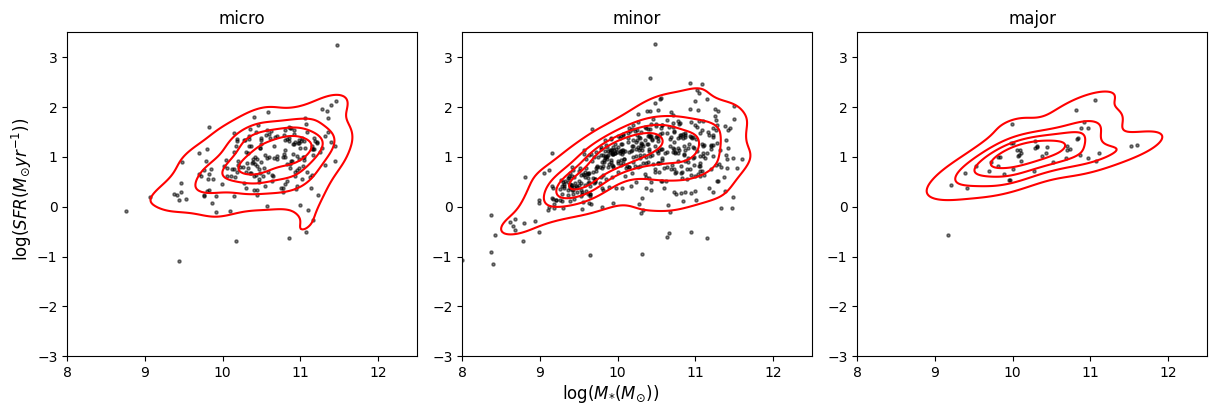

In [155]:
fig, ax = plt.subplots(ncols = 3, figsize = (12,4))
for i, int_type in enumerate(labels):
    df_type = df_mr_params.query('mr_cat == @int_type')
    scatter_contours(df_type.mass_tot, df_type.sfr_tot, ax[i], colour='black')
    ax[i].set_title(int_type)

fig.text(0.45, -0.01, '$\log(M_{*}(M_{\odot}$))', fontsize = 12)
fig.text(-0.01, 0.35, '$\log(SFR (M_{\odot}yr^{-1}))$', fontsize = 12, rotation='vertical')
fig.tight_layout()
plt.show()

### Mass Ratio SFR

In [156]:
df_mr_params.head()

,ORyan23_ID_1,ID_Prim,prim_cat,lp_mass_best_prim,ez_sfr_prim,z_prim,ORyan23_ID_2,ID_Sec,sec_cat,lp_mass_best_sec,ez_sfr_sec,z_sec,z_diff,mr,mr_cat,mass_tot,sfr_tot
0,4175032695,352511,stage1,10.44980,0.221418,0.271055,4175032695,351054,stage1,9.73456,0.516089,0.284623,-0.013568,0.192646,minor,10.526312,0.694310
1,4575953945,1124323,stage4,9.76997,-0.232994,0.313699,4575953945,1118857,stage4,9.46014,-0.202330,0.305336,0.008364,0.489971,minor,9.943148,0.083639
2,4651333659,718770,stage1,10.74354,0.730193,0.632000,4651333659,714303,stage1,9.82053,0.769956,0.658200,-0.026200,0.119396,micro,10.792524,1.051559
4,4000708110752,959618,stage1,10.97378,-1.020907,0.600800,4000708110752,958323,stage1,11.17791,1.026781,0.602500,-0.001700,0.624986,minor,11.388760,1.030655
5,4000749509721,971994,stage2,9.41265,0.694530,0.751300,4000749509721,977735,stage2,9.62591,0.661792,0.792800,-0.041500,0.611984,minor,9.833271,0.979499


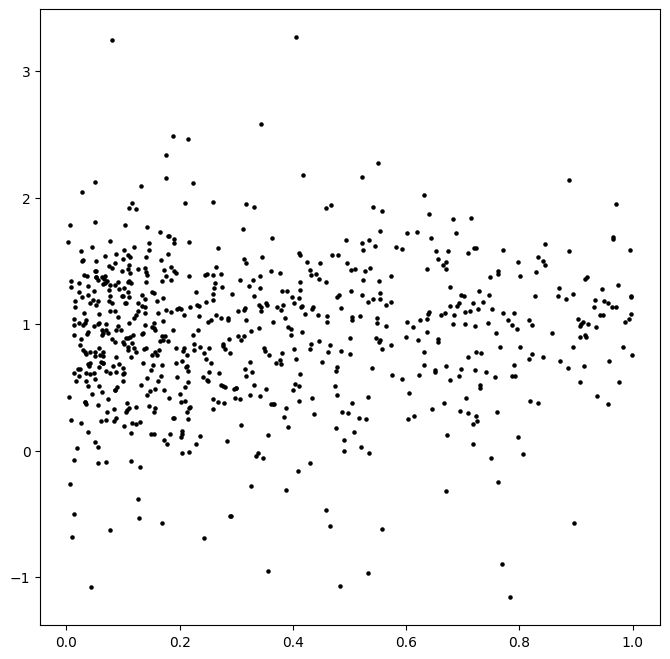

In [157]:
plt.figure(figsize = (8,8))
plt.scatter(df_mr_params.mr, df_mr_params.sfr_tot, s = 5, color = 'black')
plt.show()